<a href="https://colab.research.google.com/github/yuhi-sa/Startup/blob/main/startup2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# マルチエージェントシステム（合意アルゴリズム）
N台のエージェントから構成されるマルチエージェントシステムを考える．

マルチエージェントシステムの合意とは，
$i$番目のエージェントの状態$x_i$と任意の$j$番目のエージェントの状態$x_j$が漸近的に一致することである．


$$
\lim_{t \rightarrow \infty} x_i = x_j =\alpha
$$

$\alpha$を合意値と呼ぶ．

# マルチエージェントシステムの合意問題
マルチエージェントシステムは線形時普遍システムとして表現する事ができる．
> - エージェントの状態の更新式
$$
x_i[k+1]=x_i[k]+u_i[k]
$$
> - 入力
$$
u_i[k]=r\sum_{j \in \mathcal{N}_i}(x_j[k]-x_i[k])
$$

これを書き下すと以下のようになる．
$$
x[k+1]=x[k]+u[k] \tag{1}
$$
$$
u[k]=-rLx[k] \tag{2}
$$
$r$はゲインである．
ここで，Lは次数行列$D$隣接行列$A$で計算され，ラプラシアン行列とよぶ，
$$
L=D-A
$$
式2を式1に代入する．
$$
x[k+1]=(I_N-rL)x[k]
$$
# 参考
- [マルチエージェントシステムにおけるダイナミクスと合意協調制御](https://www.jstage.jst.go.jp/article/sicejl/52/3/52_264/_pdf)
- [グラフラプラシアンを噛み砕いて噛み砕いて跡形もなくしてみた](https://qiita.com/silva0215/items/0d1d25ef51b6865a6e15)

# *実験*

In [1]:
# n= 4の無向連結グラフを考える．
import numpy as np
# 次数
N = 4
# 単位行列
I = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0],[0,0,0,1]])
# 隣接行列
A = np.array([[0,1,0,1], [1,0,1,0], [0,1,0,1],[1,0,1,0]])
# 次数行列
D = np.array([[2,0,2,0],[0,2,0,2],[0,0,2,0],[0,0,0,2]])
# ラプラシアン行列
L = D - A

## 無向グラフの性質確認
無向連結グラフのラプラシアン行列は半正定対称行列となる．
半正定対称行列は以下の性質を持つ．
- $L1_N=0 \tag{3}$
- $1_NL=0 \tag{4}$
- $rank L =N-1 \tag{5}$

ここで$1_N$はone vectorである．

In [2]:
# ones vector
O = np.array([[1,1,1,1], [1,1,1,1], [1,1,1,1],[1,1,1,1]])
# 式3
print(np.linalg.det(np.dot(L,O)))
# 式4
print(np.linalg.det(np.dot(O,L)))
# 式5
print(np.linalg.matrix_rank(L, tol=None))

0.0
0.0
4


# 計算とプロットのプログラム

In [3]:
def calculate(r,x):
  # 最大試行回数
  MaxTimes = 20

  index = [0]
  x1 = [float(x[0])]
  x2 = [float(x[1])]
  x3 = [float(x[2])]
  x4 = [float(x[3])]

  for i in range(1,MaxTimes):
    x = np.dot((I-r*L),x)
    index.append(i)
    x1.append(float(x[0]))
    x2.append(float(x[1]))
    x3.append(float(x[2]))
    x4.append(float(x[3]))

  # プロット
  import matplotlib.pyplot as plt
  plt.plot(index, x1, label='x1', color='red')
  plt.plot(index, x2, label='x2', color='blue')
  plt.plot(index, x3, label='x3', color='yellow')
  plt.plot(index, x4, label='x4', color='green')
  plt.legend(loc='upper right', fontsize=9)
  plt.show()

## ゲインによる影響確認

ゲイン: 0.1


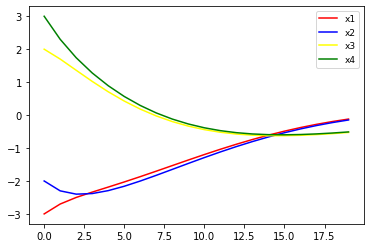

ゲイン: 0.2


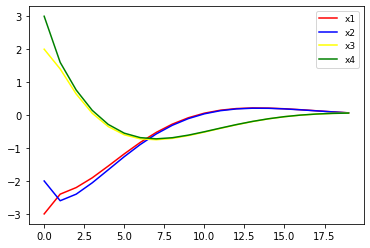

ゲイン: 0.3


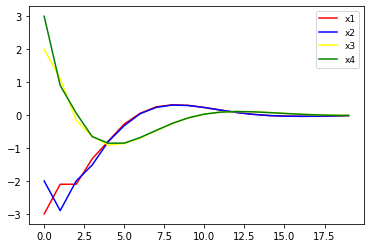

ゲイン: 0.4


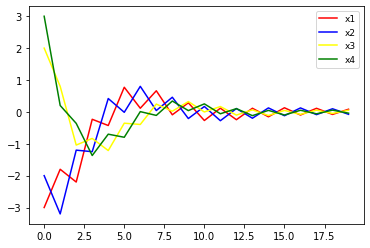

ゲイン: 0.5


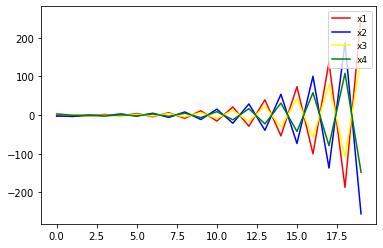

ゲイン: 0.6


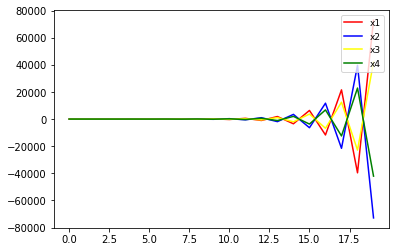

In [4]:
# 初期値
x0 = np.array([[-3],[-2],[2],[3]])
x = x0

# ゲイン
R = [0.1, 0.2, 0.3, 0.4,0.5,0.6]
#　ゲインを少しずつ変更
for r in R:
  print("ゲイン:",r)
  calculate(r,x)

ゲイン$r$が$r<\frac{1}{\delta}$の時収束し，合意値は初期値の平均であることがわかる．  
ここで$\delta$はグラフの最大次数である．

In [5]:
print("グラフの最大次数:",A.ndim)
print("1/delta:",1/A.ndim)
print("初期値の平均:",np.average(x0))

グラフの最大次数: 2
1/delta: 0.5
初期値の平均: 0.0
